In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white')

//anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# for easy access to seaborn colors
colorPalette = sns.color_palette()
snsBlue = colorPalette[0]
snsGreen = colorPalette[1]
snsRed = colorPalette[2]
snsPurple = colorPalette[3]
snsYellow = colorPalette[4]
snsAzure = colorPalette[5]

//anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


**Evolution of number of guesses**

In [11]:
sns.set_context('notebook', font_scale=1.25)

In [12]:
size4  = [256, 20, 3, 2]
size5  = [625, 81, 6, 1]
size6  = [1296, 230, 12, 1]
size7  = [2401, 616, 76, 12, 4]
size8  = [4096, 976, 122, 19, 7, 1]
size9  = [6561, 1956, 584, 133, 17]
size10 = [10000, 3048, 835, 101, 43, 7, 2, 1]

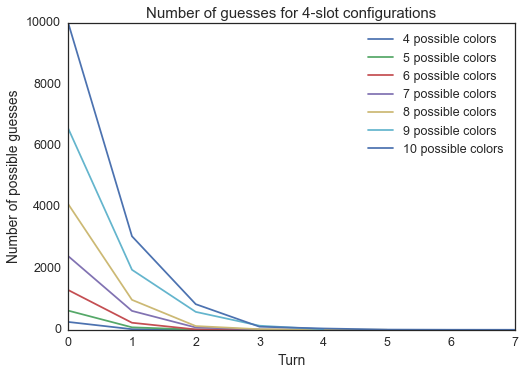

In [13]:
plt.plot(size4, label='4 possible colors')
plt.plot(size5, label='5 possible colors')
plt.plot(size6, label='6 possible colors')
plt.plot(size7, label='7 possible colors')
plt.plot(size8, label='8 possible colors')
plt.plot(size9, label='9 possible colors')
plt.plot(size10, label='10 possible colors')
plt.legend(loc='upper right')
plt.xlabel('Turn')
plt.ylabel('Number of possible guesses')
plt.title('Number of guesses for 4-slot configurations')
plt.show()

**Evolution of entropy distribution**

In [14]:
sns.set_context('notebook', font_scale=1.25)

In [15]:
entropy = dict()
entropy[0] = pickle.load(open('0.p', 'rb'))
entropy[1] = pickle.load(open('1.p', 'rb'))
entropy[2] = pickle.load(open('2.p', 'rb'))
entropy[3] = pickle.load(open('3.p', 'rb'))

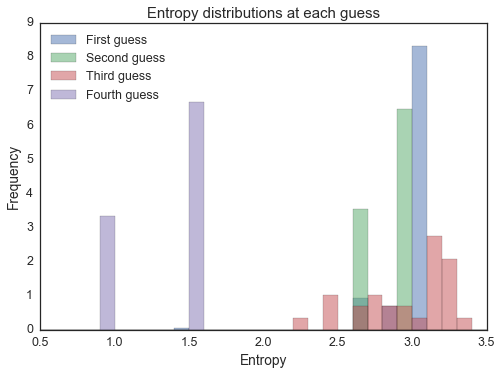

In [16]:
bins = np.arange(0.0, 4.0, 0.1)
plt.hist(entropy[0].values(), bins=bins, alpha=0.5, normed=True, color=snsBlue, label='First guess')
plt.hist(entropy[1].values(), bins=bins, alpha=0.5, normed=True, color=snsGreen, label='Second guess')
plt.hist(entropy[2].values(), bins=bins, alpha=0.5, normed=True, color=snsRed, label='Third guess')
plt.hist(entropy[3].values(), bins=bins, alpha=0.5, normed=True, color=snsPurple, label='Fourth guess')
plt.xlim(xmin=0.5, xmax=3.5)
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.title('Entropy distributions at each guess')
plt.legend(loc='best')
plt.show()

**Results by method**

In [17]:
sns.set_context('notebook', font_scale=1.5)

In [18]:
xx = range(4, 11, 1)

*Knuth*

In [34]:
num_guesses_mean = [4.0, 4.0, 4.0, 4.0, 6.0, 6.0, 6.0]
num_guesses_std  = [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000]
runtime_mean     = [0.021, 0.264, 0.606, 0.528, 21.711, 67.299, 84.160]
runtime_std      = [0.002, 0.006, 0.017, 0.014, 0.901, 1.928, 9.606]

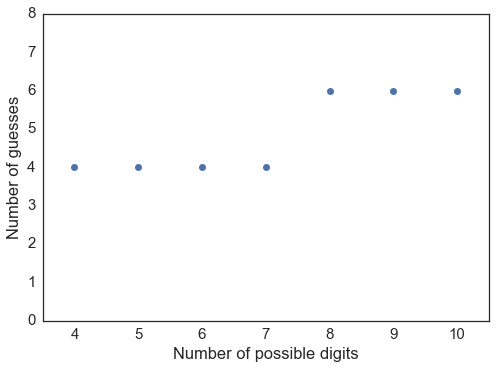

In [35]:
plt.errorbar(xx, num_guesses_mean, yerr=num_guesses_std, fmt='o')
plt.ylim(ymin=0, ymax=8)
plt.xlim(xmin=(min(xx)-0.5), xmax=(max(xx)+0.5))
plt.xlabel('Number of possible digits')
plt.ylabel('Number of guesses')
plt.show()

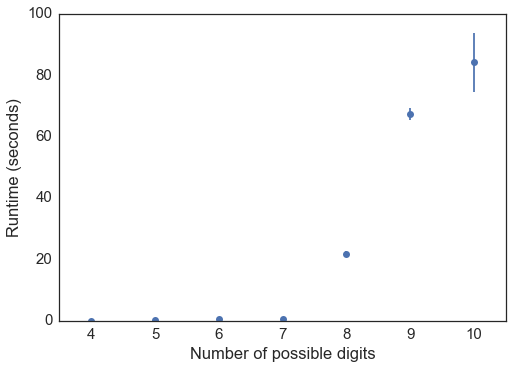

In [30]:
plt.errorbar(xx, runtime_mean, yerr=runtime_std, fmt='o')
plt.ylim(ymin=0)
plt.xlim(xmin=(min(xx)-0.5), xmax=(max(xx)+0.5))
plt.xlabel('Number of possible digits')
plt.ylabel('Runtime (seconds)')
plt.show()

*Random search*

In [25]:
num_guesses_mean = [3.7, 4.5, 4.8, 5.0, 5.4, 5.9, 6.6]
num_guesses_std  = [0.557, 0.742, 0.994, 1.023, 1.114, 0.995, 1.020]
runtime_mean     = [0.002, 0.006, 0.013, 0.023, 0.044, 0.069, 0.098]
runtime_std      = [0.000, 0.001, 0.003, 0.002, 0.005, 0.008, 0.006]

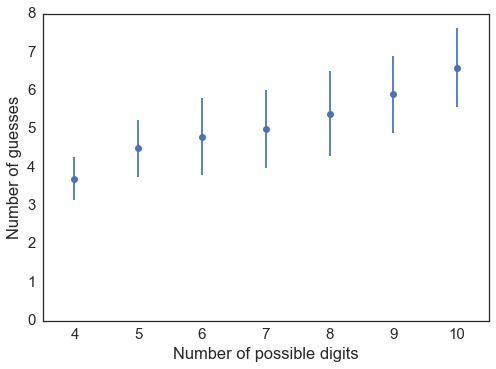

In [26]:
plt.errorbar(xx, num_guesses_mean, yerr=num_guesses_std, fmt='o')
plt.ylim(ymin=0, ymax=8)
plt.xlim(xmin=(min(xx)-0.5), xmax=(max(xx)+0.5))
plt.xlabel('Number of possible digits')
plt.ylabel('Number of guesses')
plt.show()

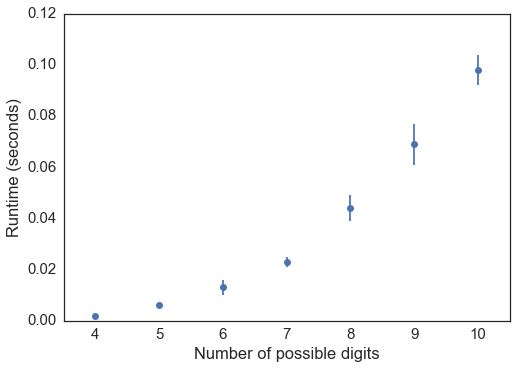

In [27]:
plt.errorbar(xx, runtime_mean, yerr=runtime_std, fmt='o')
plt.ylim(ymin=0)
plt.xlim(xmin=(min(xx)-0.5), xmax=(max(xx)+0.5))
plt.xlabel('Number of possible digits')
plt.ylabel('Runtime (seconds)')
plt.show()

*Maximizing entropy (all steps)*

In [31]:
num_guesses_mean = [3.8, 4.0, 4.8, 4.8, 5.1, 5.8, 5.8]
num_guesses_std  = [0.510, 0.497, 0.600, 0.812, 0.943, 1.043, 1.062]
runtime_mean     = [0.193, 1.147, 5.225, 18.600, 53.689, 149.057, 344.603]
runtime_std      = [0.010, 0.035, 0.207, 0.883, 1.944, 11.014, 21.921]

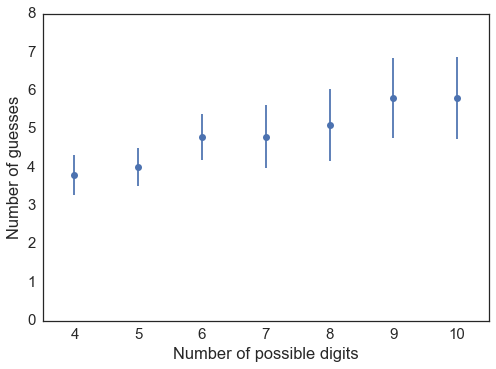

In [32]:
plt.errorbar(xx, num_guesses_mean, yerr=num_guesses_std, fmt='o')
plt.ylim(ymin=0, ymax=8)
plt.xlim(xmin=(min(xx)-0.5), xmax=(max(xx)+0.5))
plt.xlabel('Number of possible digits')
plt.ylabel('Number of guesses')
plt.show()

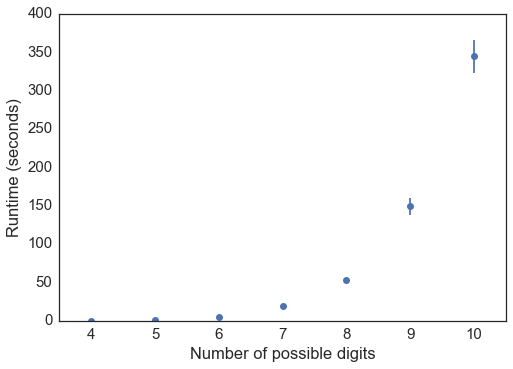

In [33]:
plt.errorbar(xx, runtime_mean, yerr=runtime_std, fmt='o')
plt.ylim(ymin=0)
plt.xlim(xmin=(min(xx)-0.5), xmax=(max(xx)+0.5))
plt.xlabel('Number of possible digits')
plt.ylabel('Runtime (seconds)')
plt.show()

*Maximizing entropy (except first step)*

In [36]:
num_guesses_mean = [3.7, 4.0, 4.4, 4.8, 5.4, 5.7, 6.0]
num_guesses_std  = [0.640, 0.894, 0.663, 0.766, 0.735, 0.714, 0.775]
runtime_mean     = [0.007, 0.042, 0.145, 0.669, 1.464, 5.702, 13.557]
runtime_std      = [0.004, 0.017, 0.099, 0.407, 1.162, 4.282, 9.339]

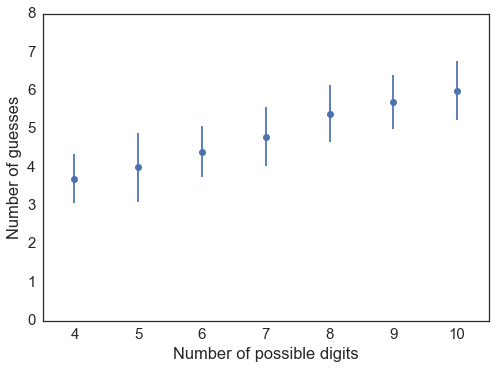

In [37]:
plt.errorbar(xx, num_guesses_mean, yerr=num_guesses_std, fmt='o')
plt.ylim(ymin=0, ymax=8)
plt.xlim(xmin=(min(xx)-0.5), xmax=(max(xx)+0.5))
plt.xlabel('Number of possible digits')
plt.ylabel('Number of guesses')
plt.show()

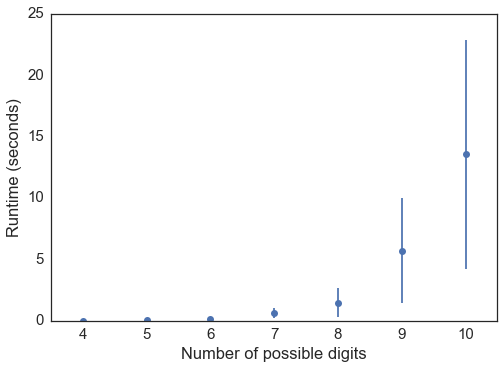

In [38]:
plt.errorbar(xx, runtime_mean, yerr=runtime_std, fmt='o')
plt.ylim(ymin=0)
plt.xlim(xmin=(min(xx)-0.5), xmax=(max(xx)+0.5))
plt.xlabel('Number of possible digits')
plt.ylabel('Runtime (seconds)')
plt.show()

*Simulated annealing (Bernier)*

In [39]:
num_guesses_mean = [7.5, 8.0, 8.0, 9.2, 9.1, 8.8, 9.4]
num_guesses_std  = [2.037, 1.359, 1.844, 1.077, 1.578, 1.824, 0.970]
runtime_mean     = [0.017, 0.042, 0.268, 0.069, 0.290, 0.191, 0.248]
runtime_std      = [0.026, 0.129, 0.421, 0.224, 0.478, 0.331, 0.513]

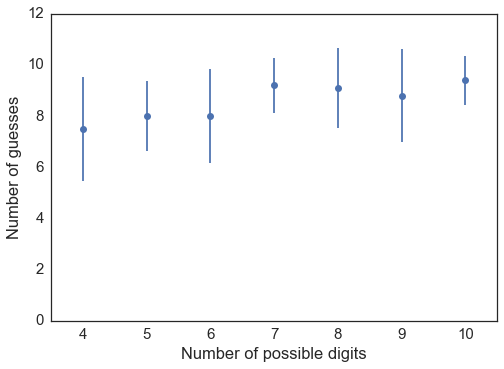

In [44]:
plt.errorbar(xx, num_guesses_mean, yerr=num_guesses_std, fmt='o')
plt.ylim(ymin=0, ymax=12)
plt.xlim(xmin=(min(xx)-0.5), xmax=(max(xx)+0.5))
plt.xlabel('Number of possible digits')
plt.ylabel('Number of guesses')
plt.show()

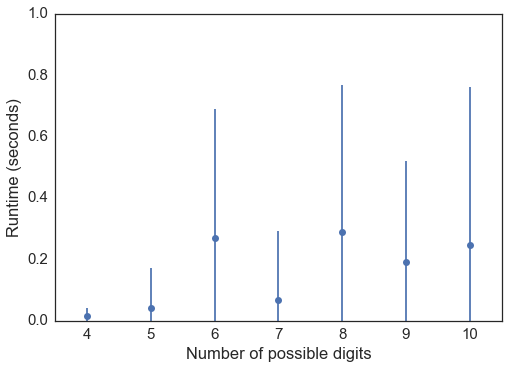

In [47]:
plt.errorbar(xx, runtime_mean, yerr=runtime_std, fmt='o')
plt.ylim(ymin=0, ymax=1.0)
plt.xlim(xmin=(min(xx)-0.5), xmax=(max(xx)+0.5))
plt.xlabel('Number of possible digits')
plt.ylabel('Runtime (seconds)')
plt.show()

*Simulated annealing (entropy)*

In [48]:
num_guesses_mean = [3.5, 4.7, 5.0, 5.3, 5.5, 6.2, 6.0]
num_guesses_std  = [0.805, 0.781, 0.949, 0.781, 1.023, 1.288, 1.304]
runtime_mean     = [0.003, 0.007, 0.013, 0.028, 0.043, 0.091, 0.127]
runtime_std      = [0.001, 0.001, 0.001, 0.005, 0.005, 0.021, 0.009]

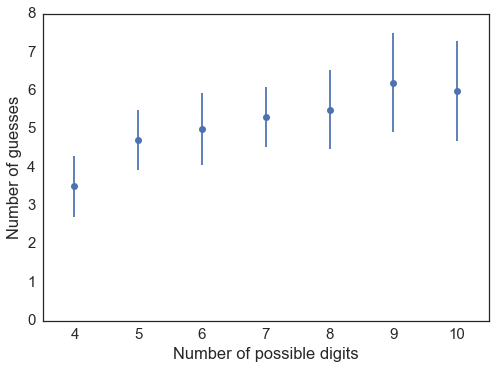

In [49]:
plt.errorbar(xx, num_guesses_mean, yerr=num_guesses_std, fmt='o')
plt.ylim(ymin=0, ymax=8)
plt.xlim(xmin=(min(xx)-0.5), xmax=(max(xx)+0.5))
plt.xlabel('Number of possible digits')
plt.ylabel('Number of guesses')
plt.show()

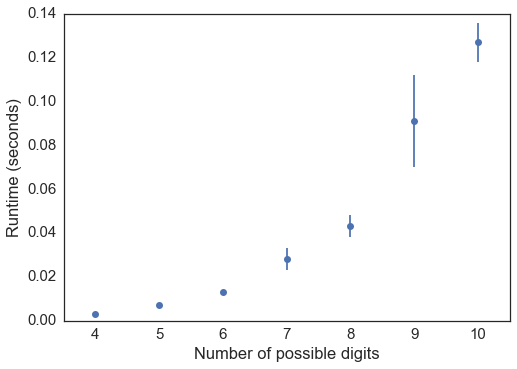

In [50]:
plt.errorbar(xx, runtime_mean, yerr=runtime_std, fmt='o')
plt.ylim(ymin=0)
plt.xlim(xmin=(min(xx)-0.5), xmax=(max(xx)+0.5))
plt.xlabel('Number of possible digits')
plt.ylabel('Runtime (seconds)')
plt.show()

*Genetic algorithms (Bernier)*

In [54]:
num_guesses_mean = [3.9, 4.0, 4.8, 5.0, 5.3, 6.0, 6.5]
num_guesses_std  = [0.831, 0.837, 0.622, 0.707, 0.954, 1.378, 1.466]
runtime_mean     = [0.022, 0.160, 0.230, 2.432, 25.809, 66.406, 77.632]
runtime_std      = [0.026, 0.289, 0.472, 3.576, 65.751, 135.881, 169.038]

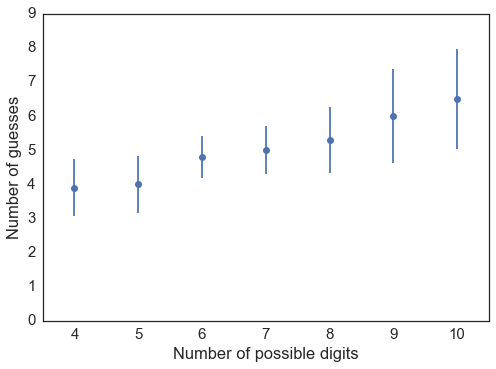

In [59]:
plt.errorbar(xx, num_guesses_mean, yerr=num_guesses_std, fmt='o')
plt.ylim(ymin=0, ymax=9)
plt.xlim(xmin=(min(xx)-0.5), xmax=(max(xx)+0.5))
plt.xlabel('Number of possible digits')
plt.ylabel('Number of guesses')
plt.show()

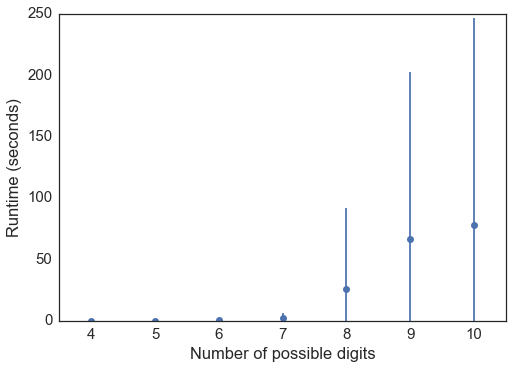

In [56]:
plt.errorbar(xx, runtime_mean, yerr=runtime_std, fmt='o')
plt.ylim(ymin=0)
plt.xlim(xmin=(min(xx)-0.5), xmax=(max(xx)+0.5))
plt.xlabel('Number of possible digits')
plt.ylabel('Runtime (seconds)')
plt.show()

*Genetic algorithms (entropy)*

In [66]:
num_guesses_mean = [3.8, 4.5, 5.0, 5.5, 5.5, 6.2, 5.9]
num_guesses_std  = [0.698, 0.740, 1.000, 0.742, 0.973, 1.122, 0.831]
runtime_mean     = [0.027, 0.273, 0.376, 1.384, 7.866, 10.492, 107.604]
runtime_std      = [0.032, 0.442, 0.660, 2.043, 22.396, 28.552, 310.685]

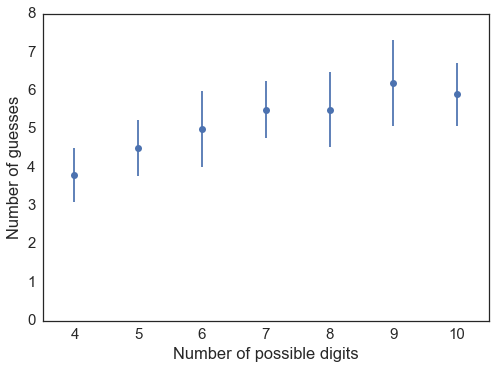

In [67]:
plt.errorbar(xx, num_guesses_mean, yerr=num_guesses_std, fmt='o')
plt.ylim(ymin=0, ymax=8)
plt.xlim(xmin=(min(xx)-0.5), xmax=(max(xx)+0.5))
plt.xlabel('Number of possible digits')
plt.ylabel('Number of guesses')
plt.show()

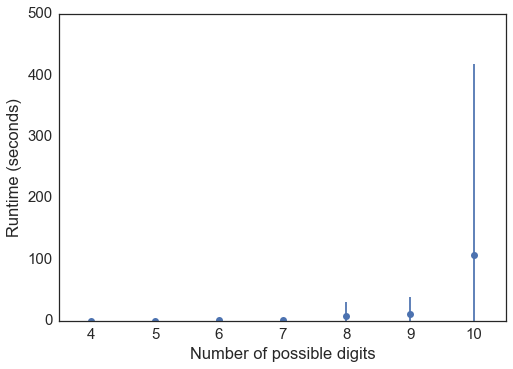

In [68]:
plt.errorbar(xx, runtime_mean, yerr=runtime_std, fmt='o')
plt.ylim(ymin=0)
plt.xlim(xmin=(min(xx)-0.5), xmax=(max(xx)+0.5))
plt.xlabel('Number of possible digits')
plt.ylabel('Runtime (seconds)')
plt.show()